# Bài 1: 
Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

# Bài 2: 
Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

# Bài 3: 
Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

# Bài 4: 
Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.

# Bài 5:
Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
Tịnh tiến (hỏi số pixel di chuyển theo x và y).
Xoay (hỏi góc xoay và chọn reshape=True/False).
Phóng to/thu nhỏ (hỏi hệ số zoom).
Làm mờ Gaussian (hỏi giá trị sigma).
Biến đổi sóng (hỏi biên độ sóng).

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

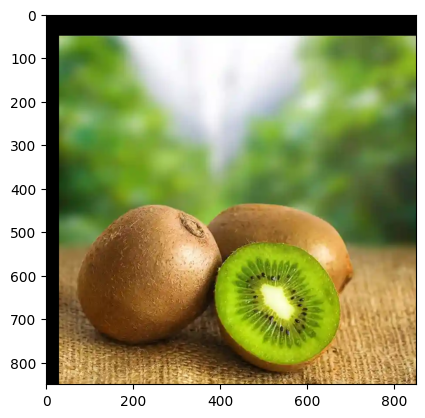

In [7]:
# bai 1
data = iio.imread("kiwi.png") 
#print(data.shape) (850, 850, 3)
bdata = nd.shift(data, (50, 30, 0)) # không biến đổi màu sắc 
plt.imshow (bdata)
plt.show()

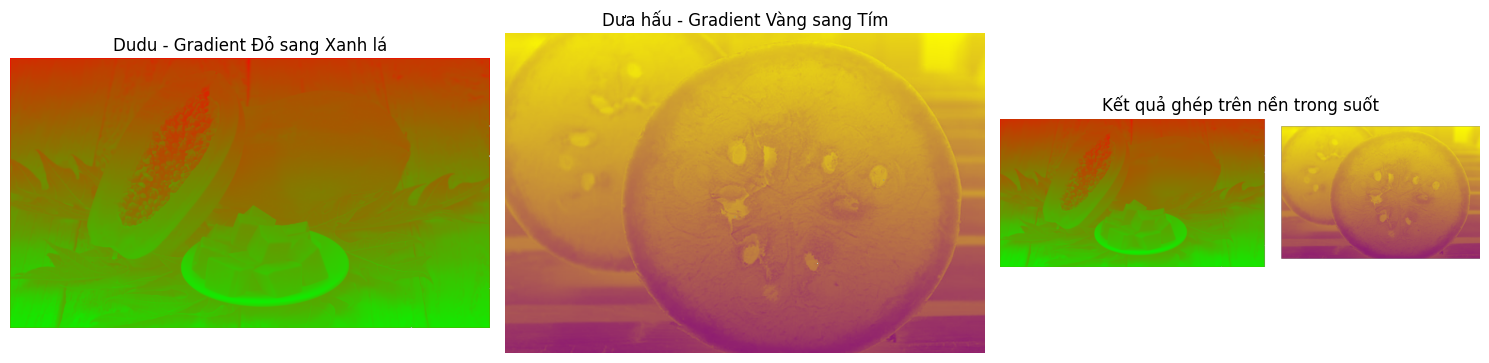

Đã lưu ảnh kết quả: fruit_gradient_combined.png


In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from PIL import Image

# Đọc ảnh dudu.png và duahau.png
dudu = iio.imread('dudu.png')
duahau = iio.imread('duahau.png')

def create_gradient_color(image, start_color, end_color):
    """
    Tạo gradient màu cho ảnh từ màu bắt đầu đến màu kết thúc
    """
    # Chuyển về grayscale để làm mask
    if len(image.shape) == 3:
        gray = np.mean(image, axis=2)
    else:
        gray = image.copy()
    
    # Normalize về [0,1]
    gray_norm = (gray - gray.min()) / (gray.max() - gray.min())
    
    # Tạo gradient màu
    height, width = gray.shape
    gradient_img = np.zeros((height, width, 4))  # RGBA
    
    for i in range(height):
        for j in range(width):
            if gray[i, j] > 0:  # Chỉ áp dụng cho pixel không phải background
                # Tính tỷ lệ gradient dựa trên vị trí và độ sáng
                ratio = (i / height) * 0.7 + gray_norm[i, j] * 0.3
                
                # Interpolate màu
                gradient_img[i, j, 0] = start_color[0] * (1 - ratio) + end_color[0] * ratio
                gradient_img[i, j, 1] = start_color[1] * (1 - ratio) + end_color[1] * ratio
                gradient_img[i, j, 2] = start_color[2] * (1 - ratio) + end_color[2] * ratio
                gradient_img[i, j, 3] = 255  # Alpha channel
    
    return gradient_img.astype(np.uint8)

# Tạo gradient đỏ sang xanh lá cho dudu
red_color = [255, 0, 0]      # Đỏ
green_color = [0, 255, 0]    # Xanh lá
dudu_gradient = create_gradient_color(dudu, red_color, green_color)

# Tạo gradient vàng sang tím cho duahau
yellow_color = [255, 255, 0]  # Vàng
purple_color = [128, 0, 128]  # Tím
duahau_gradient = create_gradient_color(duahau, yellow_color, purple_color)

# Tạo canvas với nền trong suốt
max_height = max(dudu_gradient.shape[0], duahau_gradient.shape[0])
total_width = dudu_gradient.shape[1] + duahau_gradient.shape[1] + 50  # Thêm khoảng cách
canvas = np.zeros((max_height, total_width, 4), dtype=np.uint8)

# Đặt dudu bên trái
y_offset_dudu = (max_height - dudu_gradient.shape[0]) // 2
canvas[y_offset_dudu:y_offset_dudu + dudu_gradient.shape[0], 
       :dudu_gradient.shape[1]] = dudu_gradient

# Đặt duahau bên phải
x_offset_duahau = dudu_gradient.shape[1] + 50
y_offset_duahau = (max_height - duahau_gradient.shape[0]) // 2
canvas[y_offset_duahau:y_offset_duahau + duahau_gradient.shape[0], 
       x_offset_duahau:x_offset_duahau + duahau_gradient.shape[1]] = duahau_gradient

# Lưu ảnh dưới dạng PNG với alpha channel
Image.fromarray(canvas, 'RGBA').save('fruit_gradient_combined.png')

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(dudu_gradient)
plt.title('Dudu - Gradient Đỏ sang Xanh lá')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(duahau_gradient)
plt.title('Dưa hấu - Gradient Vàng sang Tím')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canvas)
plt.title('Kết quả ghép trên nền trong suốt')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Đã lưu ảnh kết quả: fruit_gradient_combined.png")

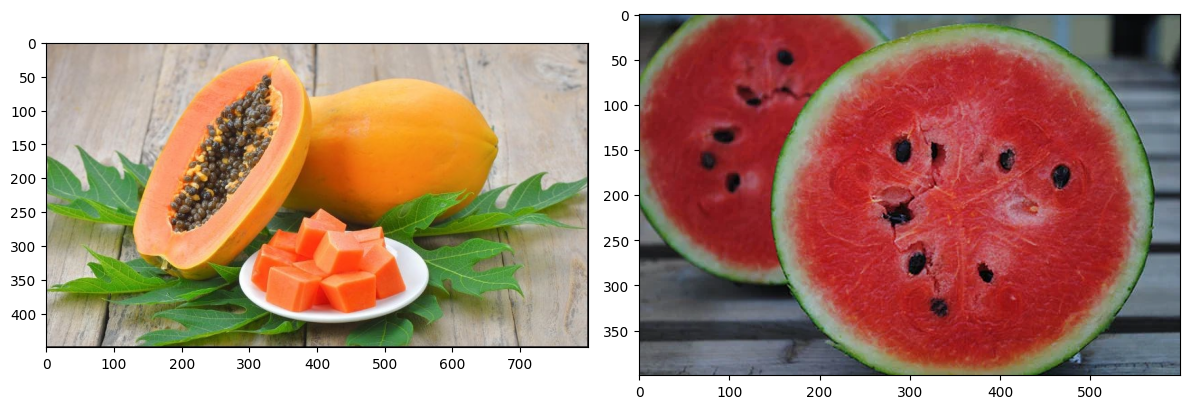

Kích thước đu đủ: (450, 800, 3)
Kích thước dưa hấu: (400, 600, 3)


In [12]:
# Đọc và hiển thị ảnh gốc dudu.png và duahau.png
dudu_original = iio.imread('dudu.png')
duahau_original = iio.imread('duahau.png')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dudu_original)


plt.subplot(1, 2, 2)
plt.imshow(duahau_original)


plt.tight_layout()
plt.show()

print(f"Kích thước đu đủ: {dudu_original.shape}")
print(f"Kích thước dưa hấu: {duahau_original.shape}")